In [1]:
import numpy as np
import pandas as pd
import networkx as nx

In [2]:
from bayesian_score_calculator import bayesian_score

In [3]:
df = pd.read_csv("./example/example.csv")
node_names = {}
for i, name in enumerate(df.columns):
    node_names[i] = name
G = nx.DiGraph()
G.add_nodes_from(range(len(df.columns)))
G.add_edge(0, 1)
G.add_edge(2, 3)
G.add_edge(4, 5)

In [4]:
score = bayesian_score(G, df)
print(score)

-132.02362143513778


In [13]:
df = pd.read_csv("./data/large.csv")
node_names = {}
for i, name in enumerate(df.columns):
    node_names[i] = name

In [ ]:
G = nx.DiGraph()
G.add_nodes_from(range(len(df.columns)))

nodes = list(G.nodes)
for k, i in enumerate(nodes[1:]):
    print(k)
    score = bayesian_score(G, df)
    
    while True:
        best_score, best_j = -np.inf, 0
        for j in nodes[:k]:
            
            if not G.has_edge(nodes[i], nodes[j]):
                G.add_edge(nodes[i], nodes[j])
                new_score = bayesian_score(G, df)
                if new_score > best_score:
                    best_score, best_j = new_score, j
                G.remove_edge(nodes[i], nodes[j])
                
        if best_score > score:
            score = best_score
            G.add_edge(nodes[i], nodes[best_j])
        else:
            break
            
S = bayesian_score(G, df)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23


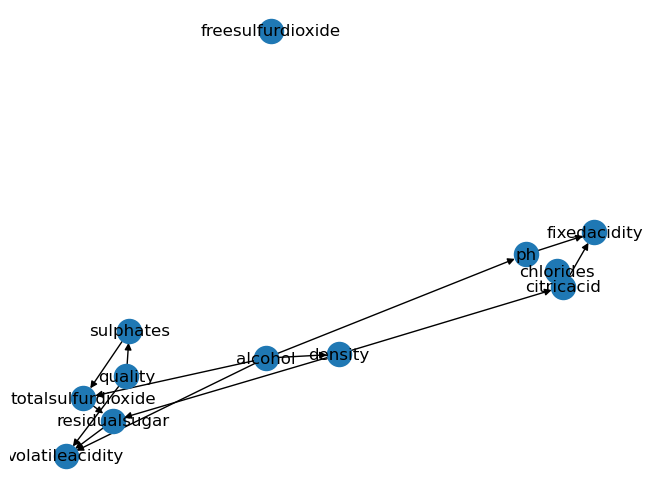

In [11]:
nx.draw(G, labels=node_names, with_labels=True)

In [12]:
print(S)

-43210.616332777645
